# Holographic Reconstruction

## Load the MDF Objects

In [28]:
from MuDataFrame import *

mdfo_calib = MuDataFrame("/Volumes/mac_extended/Research/MT/proto1b/data_sets/calibration_data/calibration_data_updated.csv")
#mdfo_calib.show()

Mystery config.

In [5]:
mdfo_lead = MuDataFrame("/Volumes/mac_extended/Research/MT/proto1b/data_sets/mystery/mystery_config.csv")
#mdfo_lead.show()

Lead Bricks with no gaps

In [3]:
mdfo_lead = MuDataFrame("/Volumes/mac_extended/Research/MT/proto1b/data_sets/lead_brick_experiment_final/lead_data.csv")
mdfo_lead.show()

,Unnamed: 0,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,...,numLHit,theta_x1,theta_y1,theta_x2,theta_y2,z_angle,SmallCounter,Run_Num,xx,yy
0,0,0,0,0,0,1,0,1,1,0,...,5,NaN,NaN,-24.429218,-134.380326,NaN,NaN,410,NaN,NaN
1,1,1,1,510238,0,1,1,1,0,1,...,6,-53.995476,-60.797804,NaN,NaN,NaN,NaN,410,14.764119,NaN
2,2,2,2,680128,0,1,1,1,1,1,...,8,43.369722,75.693507,-inf,-0.000000,6.464752,NaN,410,-18.990826,-14.251543
3,3,3,3,1190113,0,1,1,1,0,1,...,6,2.446125,1342.043451,NaN,NaN,NaN,NaN,410,-13.148333,NaN
4,4,4,4,1500428,0,1,1,1,1,1,...,8,-4.959387,-661.937877,-18.455272,-177.879054,5.185096,NaN,410,6.296684,0.842881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,1299995,99995,1299995,415072964999,0,1,1,1,1,1,...,8,-26.857397,-122.230996,-0.981846,-3343.503246,16.958188,NaN,422,-37.292360,14.723278
1299996,1299996,99996,1299996,415073134888,0,1,1,1,1,1,...,8,-73.405856,-44.721314,-41.120440,-79.833930,2.626992,NaN,422,-12.687742,19.308536
1299997,1299997,99997,1299997,415073565015,0,1,1,1,1,0,...,6,NaN,NaN,inf,0.000000,NaN,NaN,422,NaN,NaN
1299998,1299998,99998,1299998,415073675247,0,1,1,1,0,1,...,6,116.753664,28.117373,NaN,NaN,NaN,NaN,422,-2.350427,NaN


Lead Brick with gaps.

In [ ]:
mdfo_lead = MuDataFrame("/Volumes/mac_extended/Research/MT/proto1b/data_sets/lead_brick_with_gap/lead_brick_gap.csv")
mdfo_lead.show()

## Analysis Functions

In [2]:
import copy

def getXatZPlane_diffTDC(x1, x2, zplane, dsep):
    x = (zplane / dsep) * (
        getPhysicalUnitsFromDiffTDC(x1) -
        getPhysicalUnitsFromDiffTDC(x2)) + getPhysicalUnitsFromDiffTDC(x1)
    return x

def getPhysicalUnitsFromDiffTDC(tdc):
    return (55 / 130) * tdc

def getSameShapeDataSets(mdfo1, mdfo2):
    mdfo1 =  copy.copy(mdfo1)
    mdfo2 = copy.copy(mdfo2)
    s1 = len(mdfo1.events_df.index)
    s2 = len(mdfo2.events_df.index)
    s = min(s1,s2)
    mdfo1.events_df =  mdfo1.events_df.iloc[:s]
    mdfo2.events_df =  mdfo2.events_df.iloc[:s]
    return mdfo1, mdfo2

def getSameSizeData(mdfo1, mdfo2, data_term):
    mdfo1, mdfo2 = getSameShapeDataSets(mdfo1, mdfo2)
    return mdfo1.get(data_term), mdfo2.get(data_term)

def getRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    h = h1 / h2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.show()


def getNormalizedRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.savefig("tomograms/tomogram_zplane_lead_bricks_gap{}.png".format(title.strip()))
   # plt.show()

    
def getNormalizedRatioPlotMatrix( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    return h.T
    
def getNormalizedRatioPlot_nonCenter( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.savefig("tomograms/tomogram_zplane_lead_bricks_gap{}.png".format(title.strip()))
    plt.show()
    
    
def getNormalizedRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.savefig("tomograms/tomogram_zplane_lead_bricks_gap{}.png".format(title.strip()))
   # plt.show()
    
    
def getTomogramMatrix(xview, yview, axes=[-30,30], bins=(15,15),title="Data"):
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xview, yview, bins=bins, range=ranges)
    normH = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
   # return normH, , xedges, yedges
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, normH.T)
    plt.title("Reco Z plane XY View ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.show()
    
    # bbox_inches='tight',transparent=True, pad_inches=0

## Projections made at different Z Planes

In [3]:
def getProjectionData_diff(mdfo, zplane=42, dsep=165):
    xx_lead = getXatZPlane_diffTDC(mdfo.get("diffL1"), mdfo.get("diffL3"),
                                   zplane, dsep)
    yy_lead = getXatZPlane_diffTDC(mdfo.get("diffL2"), mdfo.get("diffL4"),
                                   zplane, dsep)

    return np.array(xx_lead), np.array(yy_lead)

In [33]:
zplanes = np.array([2+(n-1)*4 for n in range(1,27)])
zplanes

array([  2,   6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,
        54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102])

In [34]:
x_strings = ["xx{}".format(int(i)) for i in zplanes ]
y_strings = ["yy{}".format(int(i)) for i in zplanes ]

In [35]:
for i in range(len(zplanes)):
    mdfo_calib.events_df[x_strings[i]], mdfo_calib.events_df[y_strings[i]] = getProjectionData_diff(mdfo_calib, zplane=zplanes[i], dsep=165)
    mdfo_lead.events_df[x_strings[i]], mdfo_lead.events_df[y_strings[i]] = getProjectionData_diff(mdfo_lead, zplane=zplanes[i], dsep=165)

In [36]:
mdf_lead = mdfo_lead.events_df
mdfo_lead.og_df = mdf_lead

mdf_calib = mdfo_calib.events_df
mdfo_calib.og_df = mdf_calib

In [37]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

binn = 21
I_matrices = []


for i in range(len(zplanes)):
    xx_lead, yy_lead = mdfo_lead.get(x_strings[i]), mdfo_lead.get(y_strings[i])
    xx_calib, yy_calib = mdfo_calib.get(x_strings[i]), mdfo_calib.get(y_strings[i])
    getNormalizedRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Distance from Top Tray = {} cm".format(int(zplanes[i])))
    I_matrices.append(getNormalizedRatioPlotMatrix([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Distance from Top Tray = {} cm".format(int(zplanes[i]))))
                

In [38]:
I_matrices_reshaped = np.array(I_matrices).reshape(np.array(I_matrices).shape[0], -1)
np.savetxt("image_matrics_lead_bricks_gaps.csv", I_matrices_reshaped)

# Focus Merit

Trying one merit functions from the following types:

- derivative-based: *Brenner*

- statistical-based: *Standard deviation based correlation*

- histogram-based: *Histogram Range*

- intuitive-based: *Threshold content*

`
macro "Brenner_Gradient" {
W = getWidth();
H = getHeight();
brenner = 0; // Set to 0 which is out of focus
for (j=0; j<H; j++) {
   for (i=0; i<W; i++) {
      p = getPixel(i,j);
      p1 = getPixel(i+2,j);
      brenner += (p1-p)*(p1-p); // Maximum value is best-focused, decreasing as defocus increases
      }
   }
print(brenner); // This can also (should) be changed to return(brenner)
}`

In [39]:
def brenner(Imatrix):
    #print("len: ", len(Imatrix))
    rows, cols = int(len(Imatrix)**0.5), int(len(Imatrix)**0.5)
    Imatrix = Imatrix.reshape(rows, cols)
    brenner = 0 # out of focus
    for i in range(cols):
        for j in range(rows):
            try:
                p = Imatrix[i][j]
                p2 = Imatrix[i][j+2]
               # print("{} - {}".format(p2,p))
                brenner += (p2 - p)**2
            except:
                pass
    return brenner

# SMD (Grayscale Variance) function
def SMD(Imatrix):   
    rows, cols = int(len(Imatrix)**0.5), int(len(Imatrix)**0.5)
    Imatrix = Imatrix.reshape(rows, cols)
    value = 0 # out of focus
    for i in range(cols):
        for j in range(rows):
            try:
                p = Imatrix[i][j]
                p1 = Imatrix[i-1][j]
                p2 = Imatrix[i][j+1]
               # print("{} - {}".format(p2,p))
                value += abs(p - p1) + abs(p - p2)
            except:
                pass
    return value

def std_based_correlation(Imatrix):
    pass

def histogram_range(Imatrix):
    pass

def threshold_content(Imatrix):
    pass

In [154]:
M = np.array([np.array([1,2,3]),np.array([4,5,6]),np.array([7,8,9])])
M = M.reshape(9)
M

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [155]:
brenner(M)

len:  9
3 - 1
6 - 4
9 - 7


12

# Focus Measure Functions

Python implementations for focus measure operators described
in "Analysis of focus measure operators for shape-from-focus"
(Pattern recognition, 2012) by Pertuz et al.

In [40]:
import cv2
import numpy


def LAPV(img):
    """Implements the Variance of Laplacian (LAP4) focus measure
    operator. Measures the amount of edges present in the image.
    :param img: the image the measure is applied to
    :type img: numpy.ndarray
    :returns: numpy.float32 -- the degree of focus
    """
    return numpy.std(cv2.Laplacian(img, cv2.CV_64F)) ** 2


def LAPM(img):
    """Implements the Modified Laplacian (LAP2) focus measure
    operator. Measures the amount of edges present in the image.
    :param img: the image the measure is applied to
    :type img: numpy.ndarray
    :returns: numpy.float32 -- the degree of focus
    """
    kernel = numpy.array([-1, 2, -1])
    laplacianX = numpy.abs(cv2.filter2D(img, -1, kernel))
    laplacianY = numpy.abs(cv2.filter2D(img, -1, kernel.T))
    return numpy.mean(laplacianX + laplacianY)


def TENG(img):
    """Implements the Tenengrad (TENG) focus measure operator.
    Based on the gradient of the image.
    :param img: the image the measure is applied to
    :type img: numpy.ndarray
    :returns: numpy.float32 -- the degree of focus
    """
    gaussianX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    gaussianY = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    return numpy.mean(gaussianX * gaussianX +
                      gaussianY * gaussianY)


def MLOG(img):
    """Implements the MLOG focus measure algorithm.
    :param img: the image the measure is applied to
    :type img: numpy.ndarray
    :returns: numpy.float32 -- the degree of focus
    """
    return numpy.max(cv2.convertScaleAbs(cv2.Laplacian(img, 3)))

In [116]:
I_matrices_reshaped = np.loadtxt("image_matrics.csv")

## Lead Brick With Gap

In [41]:
focus_measure_LAPV = []
focus_measure_LAPM = []
focus_measure_TENG = []
focus_measure_MLOG = []
focus_measure_Brenner = []
focus_measure_SMD = []


for i in I_matrices_reshaped:
   # print(i)
    focus_measure_LAPV.append(LAPV(i))
    focus_measure_LAPM.append(LAPM(i))
    focus_measure_TENG.append(TENG(i))
    focus_measure_Brenner.append(brenner(i))
    focus_measure_SMD.append(SMD(i))
   # focus_measure_MLOG.append(MLOG(i))

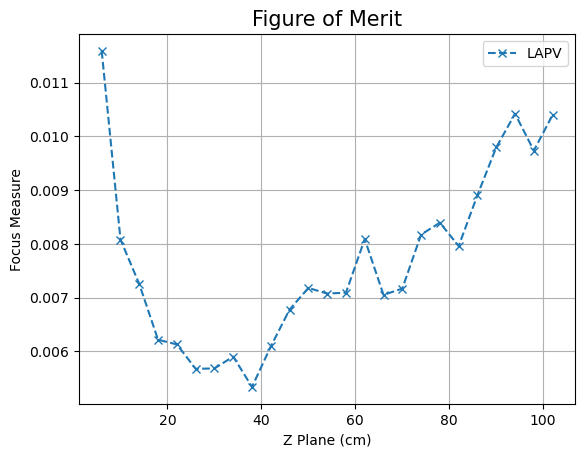

In [46]:
plt.plot(zplanes[1:],focus_measure_LAPV[1:],'--x',label='LAPV')
plt.xlabel('Z Plane (cm)')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

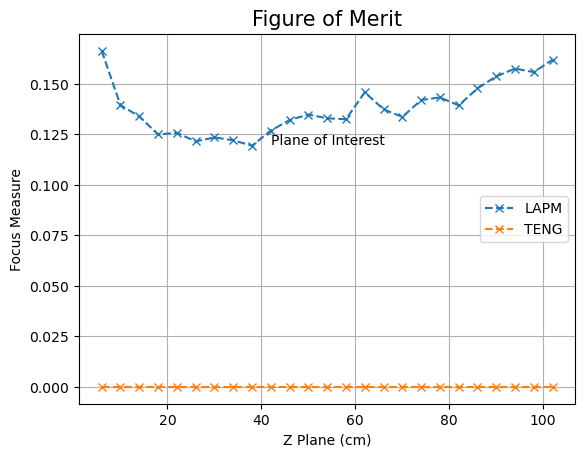

In [43]:
plt.plot(zplanes[1:],focus_measure_LAPM[1:],'--x',label='LAPM')
plt.plot(zplanes[1:],focus_measure_TENG[1:],'--x',label='TENG')
plt.xlabel('Z Plane (cm)')
plt.text(42, 0.12, 'Plane of Interest', rotation=0)


plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

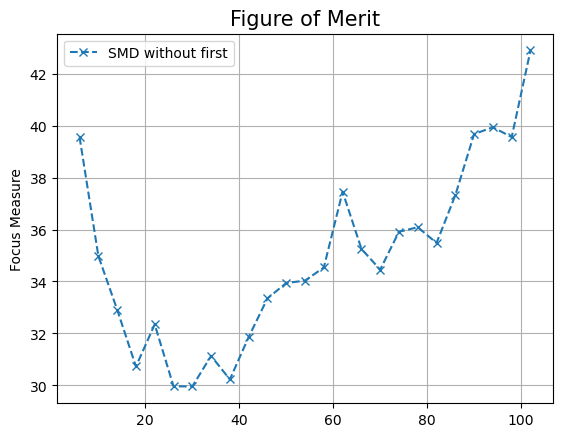

In [44]:
#plt.plot(zplanes,focus_measure_SMD,'--x',label='SMD')
plt.plot(zplanes[1:],focus_measure_SMD[1:],'--x',label='SMD without first')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

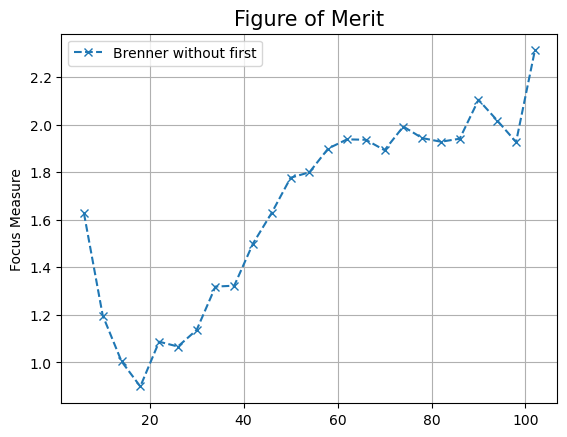

In [45]:
#plt.plot(zplanes,focus_measure_Brenner,'--x',label='Brenner')
plt.plot(zplanes[1:],focus_measure_Brenner[1:],'--x',label='Brenner without first')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

In [ ]:
z_blurry_score = np.loadtxt("blurry_z_lead_gap.csv")
z_blurry_score = sorted(z_blurry_score, key=lambda t: t[0])

x, y = [], []
for i in z_blurry_score:
    x.append(i[0])
    y.append(i[1])

In [ ]:
plt.plot(x,y,'--x', label="variance of the laplacian")
plt.xlabel('Z Plane (cm)')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.show()

## Lead Bricks (No Gap)

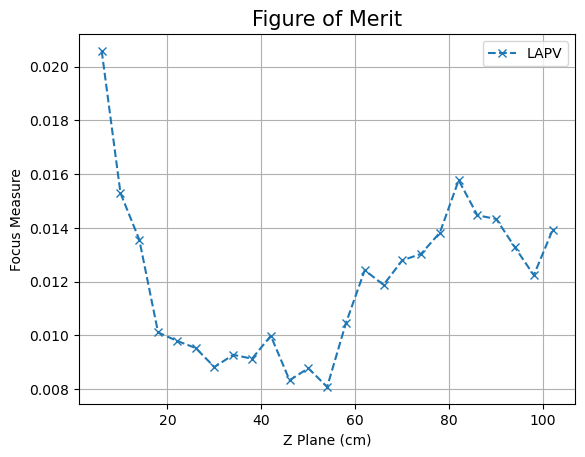

In [24]:
plt.plot(zplanes[1:],focus_measure_LAPV[1:],'--x',label='LAPV')
plt.xlabel('Z Plane (cm)')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

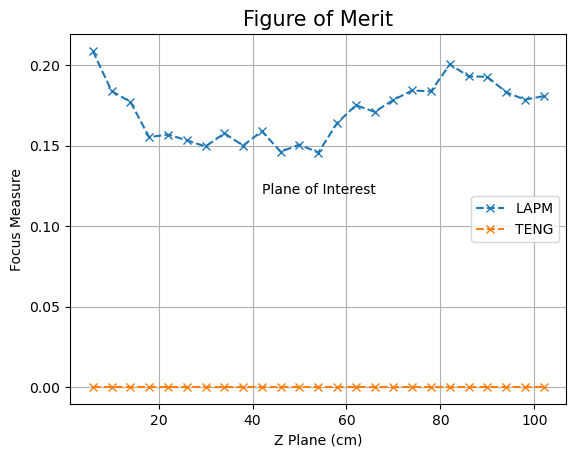

In [21]:
plt.plot(zplanes[1:],focus_measure_LAPM[1:],'--x',label='LAPM')
plt.plot(zplanes[1:],focus_measure_TENG[1:],'--x',label='TENG')
plt.xlabel('Z Plane (cm)')
plt.text(42, 0.12, 'Plane of Interest', rotation=0)


plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

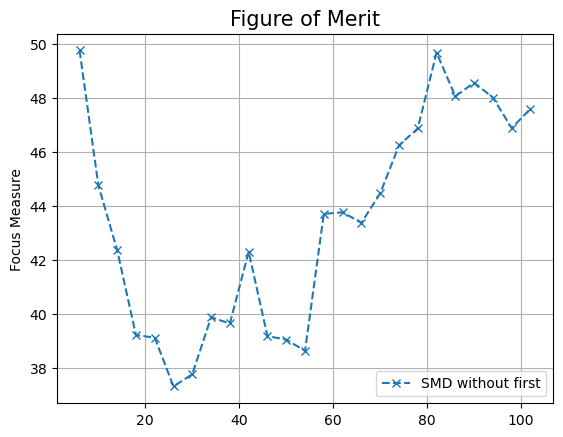

In [18]:
#plt.plot(zplanes,focus_measure_SMD,'--x',label='SMD')
plt.plot(zplanes[1:],focus_measure_SMD[1:],'--x',label='SMD without first')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

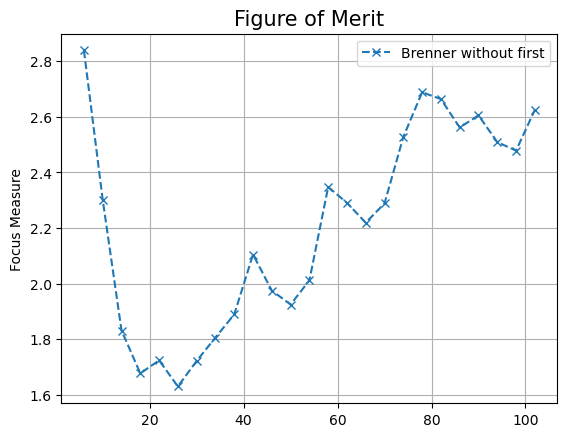

In [19]:
#plt.plot(zplanes,focus_measure_Brenner,'--x',label='Brenner')
plt.plot(zplanes[1:],focus_measure_Brenner[1:],'--x',label='Brenner without first')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

In [25]:
z_blurry_score = np.loadtxt("blurry_z_lead.csv")
z_blurry_score = sorted(z_blurry_score, key=lambda t: t[0])

x, y = [], []
for i in z_blurry_score:
    x.append(i[0])
    y.append(i[1])

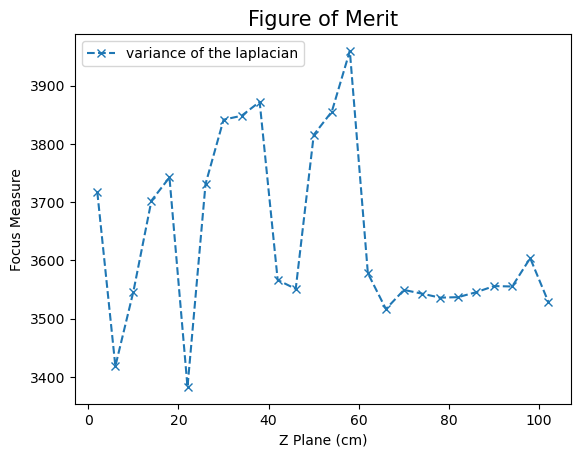

In [27]:
plt.plot(x,y,'--x', label="variance of the laplacian")
plt.xlabel('Z Plane (cm)')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.show()

## Mystery Config

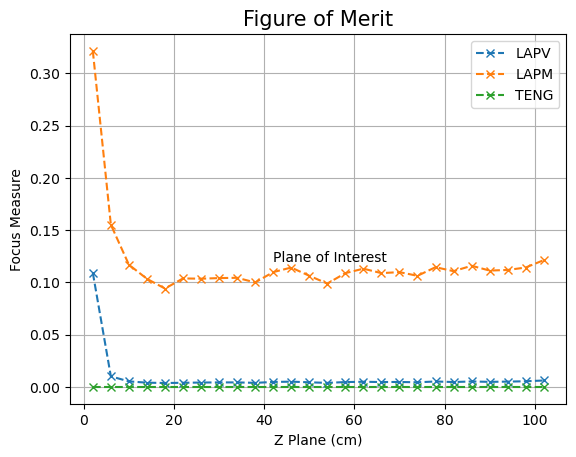

In [170]:
plt.plot(zplanes,focus_measure_LAPV,'--x',label='LAPV')
plt.plot(zplanes,focus_measure_LAPM,'--x',label='LAPM')
plt.plot(zplanes,focus_measure_TENG,'--x',label='TENG')
plt.xlabel('Z Plane (cm)')
plt.text(42, 0.12, 'Plane of Interest', rotation=0)


plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

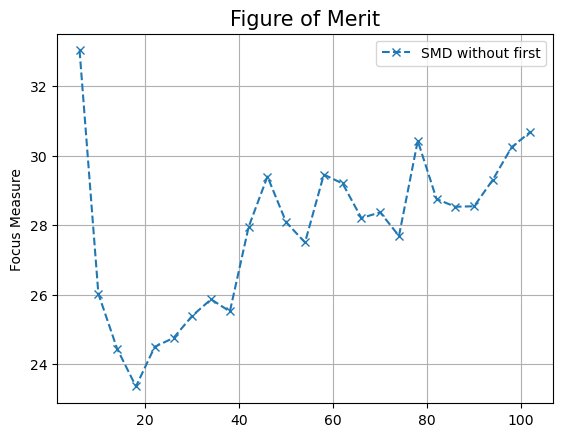

In [178]:
#plt.plot(zplanes,focus_measure_SMD,'--x',label='SMD')
plt.plot(zplanes[1:],focus_measure_SMD[1:],'--x',label='SMD without first')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

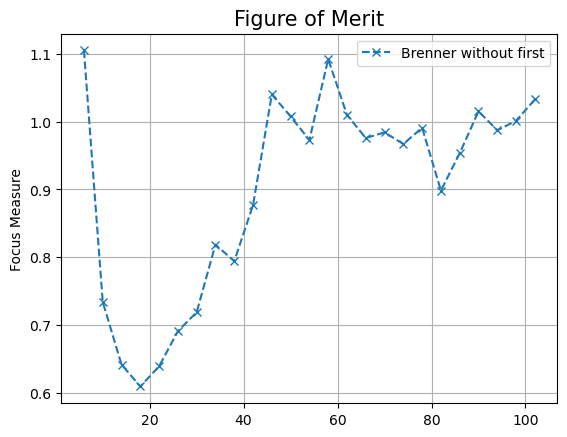

In [177]:
#plt.plot(zplanes,focus_measure_Brenner,'--x',label='Brenner')
plt.plot(zplanes[1:],focus_measure_Brenner[1:],'--x',label='Brenner without first')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.grid()
plt.show()

In [85]:
z_blurry_score = np.loadtxt("blurry_z.csv")
z_blurry_score = sorted(z_blurry_score, key=lambda t: t[0])

x, y = [], []
for i in z_blurry_score:
    x.append(i[0])
    y.append(i[1])

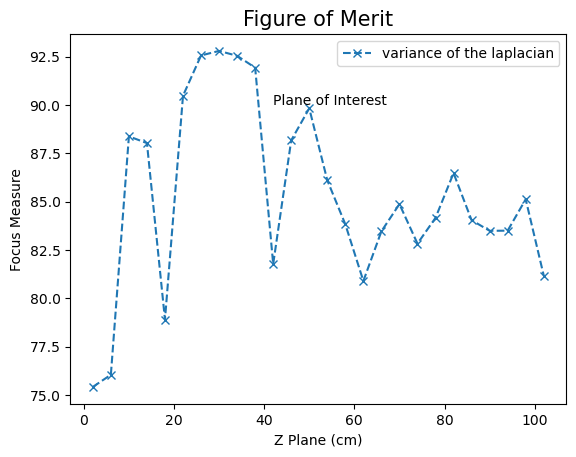

In [82]:
plt.plot(x,y,'--x', label="variance of the laplacian")
plt.text(42, 90, 'Plane of Interest', rotation=0)
plt.xlabel('Z Plane (cm)')
plt.legend()
plt.ylabel('Focus Measure')
plt.title('Figure of Merit',fontsize=15)
plt.show()

## Generating Zstack

In [22]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

In [35]:
"""
csvFiles = ["image_matrics_lead_bricks.csv","image_matrics_lead_bricks_gaps.csv"]
fileNames = ["lead_bricks","lead_brick_gaps" ]
"""
folder = "lead_brick_gaps"
file = "image_matrics_lead_bricks_gaps.csv"
I_matrices_reshaped = np.loadtxt(file)

filters = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


for j in range(len(filters)):
    dir_name = "/Users/sshanto/hep/hep_daq/CAMAC/focus-stacking/images/{}/{}".format(folder, filters[j])
    mkdir_p(dir_name)
    k = 0
    print("Using {} filter".format(filters[j]))
    for i in I_matrices_reshaped:
        i = i.reshape(21,21)
        fig = plt.figure(frameon=False)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        imshowobj = ax.imshow(np.flip(i), aspect='auto',interpolation=filters[j])
        imshowobj.set_clim(0.9,1.2)
        fname = "{}/img{}.png".format(dir_name,k)
        fig.savefig(fname)
        k +=1
    """
        for i in I_matrices_reshaped:
        i = i.reshape(21,21)
        plt.matshow(np.flip(i), interpolation=filters[j])
        plt.savefig('{}/img{}.png'.format(dir_name,k),bbox_inches='tight',transparent=True, pad_inches=0)
        k +=1
    """

    

Using none filter
Using nearest filter
Using bilinear filter
Using bicubic filter
Using spline16 filter
Using spline36 filter
Using hanning filter
Using hamming filter
Using hermite filter
Using kaiser filter
Using quadric filter
Using catrom filter
Using gaussian filter
Using bessel filter
Using mitchell filter
Using sinc filter
Using lanczos filter


In [36]:
"""
csvFiles = ["image_matrics_lead_bricks.csv","image_matrics_lead_bricks_gaps.csv"]
fileNames = ["lead_bricks","lead_brick_gaps" ]
"""
folder = "lead_bricks"
file = "image_matrics_lead_bricks.csv"
I_matrices_reshaped = np.loadtxt(file)

filters = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


for j in range(len(filters)):
    dir_name = "/Users/sshanto/hep/hep_daq/CAMAC/focus-stacking/images/{}/{}".format(folder, filters[j])
    mkdir_p(dir_name)
    k = 0
    print("Using {} filter".format(filters[j]))
    for i in I_matrices_reshaped:
        i = i.reshape(21,21)
        fig = plt.figure(frameon=False)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        imshowobj = ax.imshow(np.flip(i), aspect='auto',interpolation=filters[j])
        imshowobj.set_clim(0.9,1.2)
        fname = "{}/img{}.png".format(dir_name,k)
        fig.savefig(fname)
        k +=1
    """
        for i in I_matrices_reshaped:
        i = i.reshape(21,21)
        plt.matshow(np.flip(i), interpolation=filters[j])
        plt.savefig('{}/img{}.png'.format(dir_name,k),bbox_inches='tight',transparent=True, pad_inches=0)
        k +=1
    """

    

Using none filter
Using nearest filter
Using bilinear filter
Using bicubic filter
Using spline16 filter
Using spline36 filter
Using hanning filter
Using hamming filter
Using hermite filter
Using kaiser filter
Using quadric filter
Using catrom filter
Using gaussian filter
Using bessel filter
Using mitchell filter
Using sinc filter
Using lanczos filter
